# <font color="#ff9900"> **CNN com Keras**</font>
---

As <font color="#66ffff"> Redes Neurais Convolucionais (Convolutional Neural Networks - **CNNs**)</font> são uma classe de algoritmos de aprendizado profundo projetados especificamente para analisar dados visuais, como imagens e vídeos. Elas são amplamente utilizadas em tarefas de visão computacional, como classificação de imagens, detecção de objetos e segmentação de imagens. As CNNs alcançaram um sucesso notável nessas áreas, superando o desempenho humano em alguns casos.

O *building block* básico de uma CNN é uma `convolutional layer`. A operação de convolução envolve a aplicação de um conjunto de filtros aprendíveis (também conhecidos como *kernels*) aos dados de entrada. Esses filtros deslizam (*slide over*) sobre o espaço de entrada, realizando multiplicação elemento a elemento e agregando os resultados através da soma para produzir mapas de características. Os filtros capturam padrões ou características locais presentes na entrada, como bordas, texturas ou formas.

As CNNs também incorporam outras camadas para aprimorar suas capacidades. Um tipo comum é a camada de *pooling*, que reduz as dimensões espaciais dos mapas de características, retendo as informações mais relevantes. O `max pooling` é uma operação de *pooling* popular que seleciona o valor máximo dentro de cada janela de *pooling*, reduzindo o tamanho dos mapas de características.

Outra camada fundamental nas CNNs é a camada de ativação, que introduz não-linearidades na rede. Funções de ativação comuns usadas em CNNs incluem a `Rectified Linear Units (ReLU)`, que define valores negativos como zero e mantém os valores positivos inalterados, e variantes como `Leaky ReLU` e ``Parametric ReLU``. Essas não-linearidades permitem que a rede modele relações complexas entre os dados de entrada e a saída desejada.

As CNNs geralmente consistem em várias camadas convolucionais seguidas por camadas de pooling e ativação. As camadas finais de uma CNN são as camadas totalmente conectadas, também conhecidas como camadas densas, que levam as características de alto nível aprendidas das camadas anteriores e as mapeiam para as classes de saída ou previsões. Essas camadas são frequentemente seguidas por uma função de ativação `softmax` para produzir distribuições de probabilidade sobre as classes.

Durante o treinamento, as CNNs empregam um processo chamado retropropagação, em que a rede aprende os valores ótimos de seus parâmetros ajustando-os iterativamente para minimizar uma função de perda especificada. Esse ajuste é feito por meio de algoritmos de otimização como `Stochastic Gradient Descent (SGD)` ou suas variantes.

Para treinar CNNs de forma eficaz, é necessário um grande conjunto de dados rotulados. A rede aprende a reconhecer vários padrões e características generalizando a partir dos exemplos nos dados de treinamento. Uma vez treinadas, as CNNs podem ser implantadas para fazer previsões sobre novos dados não vistos.

Resumindo, as **CNNs são um tipo de modelo de aprendizado profundo projetado para análise de dados visuais**. Elas aproveitam camadas convolucionais para extrair características locais, camadas de *pooling* para reduzir dimensões espaciais e camadas de ativação para introduzir não-linearidades. Empilhando essas camadas, as CNNs podem **aprender representações hierárquicas dos dados de entrada**, permitindo que realizem tarefas como classificação de imagens, detecção de objetos e muito mais.

# **Keras**</font>
---

<font color="#66ffff">**Keras**</font> (https://keras.io/) é uma biblioteca de rede neural de código aberto escrita em Python. É projetada para ser amigável ao usuário, modular e extensível, fornecendo uma interface de alto nível para construir e treinar modelos de aprendizado profundo. O Keras é construído em cima de outros *frameworks* populares de aprendizado profundo como ``TensorFlow`` (https://www.tensorflow.org/), Microsoft Cognitive Toolkit -``CNTK`` (https://learn.microsoft.com/en-us/cognitive-toolkit/) e ``Theano`` (https://github.com/Theano/Theano), o que permite que ele aproveite o poder e desempenho desses *frameworks* enquanto fornece uma interface mais acessível e fácil de usar. Tais *frameworks* são o *backend* computacional do Keras.

O próprio ``TensorFlow`` vem com uma implementação particular do Keras, ``tf.keras``. Há suporte apenas ao ``TensorFlow`` como *backend*, oferecendo a vantagem de suporte ao TensorFlow Data API.

Além das bibliotecas ``Numpy``, ``Pandas`` e ``Matplotlib``, vamos utilizar ``keras`` de ``tensorflow``.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras

print(f'Keras:{keras.__version__}')  # version

Keras:3.8.0


Criação do Modelo
--

Vamos criar um modelo CNN simples. Mas antes vamos revisar os tipos de camadas (*layers*) tipicamente encontrados em uma CNN e sua representação em Keras.

``Sequential``é um modelo Keras composto de camadas empilhadas e conectadas sequencialmente entre si. Uma CNN pode ser instanciada como um modelo ``Sequential`` porque cada camada tem exatamente uma entrada e uma saída, e são empilhadas juntas para formar toda a rede.

Tipicamente, camadas em uma CNN são empilhadas da seguinte forma:
<font color="#ff9900">
par de camadas **Convolutional-Pooling** → par de camadas **Convolutional-Pooling** → uma camada **flattened** → camadas **Multiple dense**
</font>

> Cada *convolutional layer* é criada com um objeto da classe ``Conv2D`` que aplica a operação de convolução em um espaço 2D. Ou seja, o *kernel* (*filter*) é deslocado sobre a imagem de entrada.

Dentre os parâmetros importantes de ``Conv2D`` temos:
- ``filters`` ➡️ O número de filtros (*kernels*), também chamado de profundidade do mapa de características. É um número inteiro. Normalmente, aumentamos o número de filtros em cada camada convolucional, p.ex.: 16, 32, 64, 128, etc.

- ``kernel_size`` ➡️ Especifica a altura e largura da *kernel window* (convolução). Número inteiro ou uma tupla de dois números inteiros, como $(3, 3)$, $(5, 5)$, etc. Na maioria dos casos, a janela é um quadrado com a mesma altura e largura, podendo ser especificado como um único número inteiro, p. ex.: 3 para uma janela $(3, 3)$.

- ``strides`` ➡️ O número de *steps* (pixels) que movemos o filtro sobre a imagem de entrada. Recebe uma tupla para os passos ao longo da altura e largura. Se a altura e largura forem iguais, podemos usar um número inteiro. O padrão é $(1, 1)$.

- ``padding`` ➡️ Existem duas opções: ``valid`` ou ``same``. ``valid`` é sem padding e ``same`` resulta em *padding* com zeros de forma que o tamanho do *feature map* seja o mesmo que o tamanho da entrada quando ``strides=1``.

- ``activation`` ➡️ O tipo de função de ativação a ser usada na camada convolucional. O padrão é nenhuma ativação, o que é equivalente à ativação linear ou identidade. Geralmente, usamos a função de ativação ``relu`` em cada camada convolucional. Recordando, a função ReLU pode ser definida como
\begin{align}
  f(x) = x^+ = max(x, 0) = \left\{
        \begin{array}{cl}
             x & x \gt 0 \\
             0 & otherwise             
        \end{array}
        \right.
\end{align}

sendo $x$ o neurônio de entrada.

- ``input_shape`` ➡️ Indica a altura, largura e profundidade da entrada como uma tupla de inteiros. Ou seja, este é o tamanho da imagem de entrada. É obrigatório especificar esse argumento na primeira camada convolucional se for a primeira camada no modelo imediatamente após a camada de entrada. Esse argumento não é incluído em outras camadas convolucionais intermediárias.

> Uma instância de ``MaxPooling2D`` representa uma *pooling layer*. Normalmente é usada em par com a camada convolucional. Existem dois tipos: **Max pooling** e **Average pooling**.

Dentre os parâmetros importantes de ``MaxPooling2D`` temos:

- ``pool_size`` ➡️ O tamanho da *pooling window*, sendo o padrão $(2, 2)$. Se a altura e largura forem iguais, podemos usar um número inteiro.

- ``strides`` ➡️ O número de *steps* (pixels) que movemos a ``pooling window``sobre o *feature map* em cada *step pooling*. Recebe uma tupla para os passos ao longo da altura e largura. Se a altura e largura forem iguais, podemos usar um número inteiro. O padrão é ``None`` usando assim ``pool_size``.

- ``padding`` ➡️ Existem duas opções: ``valid`` ou ``same``. ``valid`` é sem padding e ``same`` resulta em *padding* com zeros de forma que o tamanho do *feature map* seja o mesmo que o tamanho da entrada quando ``strides=1``.


> Nas CNNs existe uma *flattened layer* entre a camada final de *pooling* e a primeira camada totalmente conectada (*dense layer*). A *flattned layer* poder vista como uma coluna única. que armazena os valores de entrada. No Keras usamos a classe ``Flatten``.


> A camada final de uma CNN normalmente é uma *fully connected (dense) layer*. Em Keras temos a classe ``Dense`` e dentre seus parâmetros destacamos:

- ``units`` ➡️ Número de nodos (*units*) na camada. Um valor inteiro.

- ``activation`` ➡️ Tipo de função de ativação. Padrão é ``None``, isto é sem ativação (*linear*/*identity*).

- ``input_shape`` ➡️ Só necessário informar se for a primeira camada da CNN.

Arquitetura da CNN
--

Considere que queremos classificar imagens em escala de cinza (*single channel*), cada imagem com dimensão de $28 \times 28$ pixels. Tais imagens constituem o  *dataset* <font color="#ff9900">**Fashion MNIST** </font> de itens de vestuário, que já usamos no modelo MLP e detalharemos mais adiante. Assim, nosso ``input_shape``será $(28, 28, 1)$.

Definimos então a seguinte arquitetura:

- **Convolutional layers**: Três camadas, contendo 64, 128 e 256 filtros respectivamente. Estamos aprendendo os filtros com *kernel* de $5 \times 5$. Usamos ``relu`` como função de ativação para todas elas.

- **Pooling layers**:  Também três, uma para cada *convolutional layer*. O ``pool_size`` será $(2, 2)$. A camada de *max pooling* reduzirá o tamanho da entrada usando *kernel* $2 \times 2$

- **Flatten layer**: Uma única entre a camada final de *pooling*  e a primera camada *dense*.

- **Dense layers**:  Duas, sendo a primeira com 256 *units*  e a segunda com 10. A primeira *dense layer* usa uma função de ativação ``relu`` e a última uma função ``softmax``. Note a quantidade de *units*  da última camada relacionada com a quantidade de classes do nosso problema, isto é, 10.


In [ ]:
kernel = (5, 5)  # kernel size of 5x5
pool = (2, 2)  # pool size 2x2

model = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=pool),

    keras.layers.Conv2D(128, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    keras.layers.Conv2D(256, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

> 💡 **Nota**: O método ``summary()`` do objeto ``model`` exibe as camadas definidas no modelo.  Veja a quantidade de parâmetros treináveis e compare com um modelo MLP. Aqui já passa de **1,5 milhão**! 🙀🙀

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

Observando o resultado do método ``summary``, na coluna do meio, podemos ver a forma de saída de cada camada. Por exemplo, a primeira camada ``Conv2D`` tem uma saída de ``(None, 28, 28, 64)``, indicando as dimensões do *feature map* após a realização da primeira operação de convolução. O tamanho do mapa de características é de $28 \times 28$ e a profundidade é de $64$ porque são usados 64 filtros. O primeiro valor na tupla é ``None``, o que denota o número de instâncias de treinamento (*batch size*). O valor exato para isso será determinado quando os dados de entrada forem fornecidos ao modelo. Por enquanto, ele está definido como simplesmente ``None``.

A coluna mais à direita mostra o número de parâmetros envolvidos em cada camada. Observe que as camadas de *pooling* e *flattened* não têm parâmetros.

As camadas do modelo também podem ser acessadas individualmente.

In [ ]:
print(model.layers)

conv1 = model.layers[0]  # first convolutional layer

print(f'\nFirst convolutional layer name: {conv1.name}')

[<keras.layers.convolutional.conv2d.Conv2D object at 0x7f7503ae3760>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f7503ae1cf0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f7503ae2800>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f7503ae21a0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f755dd7f5b0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f7503ae1ff0>, <keras.layers.reshaping.flatten.Flatten object at 0x7f75880ea830>, <keras.layers.core.dense.Dense object at 0x7f75038cc550>, <keras.layers.core.dense.Dense object at 0x7f75038cc940>]

First convolutional layer name: conv2d


E os parâmetros de uma camada pode ser obtidos com ``get_weights``.

Perceba os pesos (``weights``) inicializados randomicamente e os termos bias com zero.

In [ ]:
weights, biases = conv1.get_weights()

print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')

print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')

Layer weights shape:
(5, 5, 1, 64)

Layer weights:
[[[[-5.65693751e-02  3.99251916e-02  5.75053580e-02 ... -8.69438052e-03
    -5.76252863e-02  1.70218535e-02]]

  [[-3.47666033e-02 -3.67727540e-02  3.19047607e-02 ... -1.74723268e-02
     2.37699486e-02  4.49601971e-02]]

  [[ 4.29034121e-02  6.05075173e-02  2.86319517e-02 ...  4.14863713e-02
    -1.20791197e-02 -2.12340690e-02]]

  [[ 3.40529121e-02  5.65579273e-02 -3.45507413e-02 ...  6.05684035e-02
    -3.55328396e-02 -3.58556472e-02]]

  [[-5.89617006e-02  2.83025615e-02  2.27948464e-02 ...  1.32389031e-02
     3.35539095e-02 -3.13373469e-02]]]


 [[[-2.97933854e-02  5.05900942e-02  9.84017178e-03 ...  2.74089538e-02
     3.29977982e-02 -1.65370964e-02]]

  [[ 6.01992011e-04  2.36834623e-02  4.88090925e-02 ... -3.64791602e-03
     2.91090496e-02  1.42742321e-03]]

  [[-2.14728713e-03 -3.80636938e-02 -6.64927065e-04 ... -1.77645646e-02
    -1.98790953e-02  3.78063954e-02]]

  [[ 4.24003974e-03 -3.47185805e-02  2.35078149e-02 ...  8.

Importação de um *Dataset* e Análise Exploratória
--

Vamos usar o *dataset* <font color="#ff9900">**Fashion MNIST** </font> (https://github.com/zalandoresearch/fashion-mnist) que é uma coleção de 70.000 imagens em escala de cinza de itens de vestuário, cada uma com tamanho de $28 \times 28$ pixels. Foi projetado como um substituto do conjunto de dados MNIST (http://yann.lecun.com/exdb/mnist/) mais tradicional, que contém dígitos manuscritos. Os itens de vestuário Fashion MNIST incluem itens como camisetas, calças, vestidos, tênis e sandálias, entre outros. É um *dataset* mais desafiador do que o MNIST original, pois contém imagens mais complexas e variadas. Também é mais relevante para aplicações do mundo real, pois imita de perto o tipo de imagens que são comumente encontradas em aplicativos de comércio eletrônico e *sites* de compras *on-line*.



In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Carregada a base, vamos investigar o conteúdo. Cada imagem é representada como um *array* $28 \times 28$, sendo cada intensidade na faixa $0-255$ ao invés de floats.

In [ ]:
print(f'Dataset shape:{X_train_full.shape}')

print(f'First instance shape:{X_train_full[0].shape}')
print(f'\nFirst instance:\n {X_train_full[0]}')

Dataset shape:(60000, 28, 28)
First instance shape:(28, 28)

First instance:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141

Mas o que é esse *array*? 🤔
Vamos exibi-lo como uma imagem usando ``plt.imshow``.


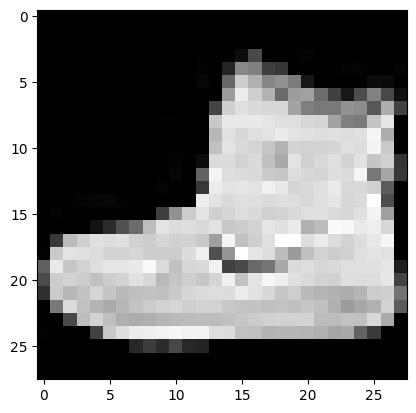

In [ ]:
fig = plt.imshow(X_train_full[0], cmap=plt.cm.gray)
plt.show()

*Super!* Parece um tipo de calçado, *ankle boot*. 👢

Felizmente temos o rótulo de cada imagem (instância). Vamos mapear o códigos das rótulos para os nomes das classes. Veja em https://github.com/zalandoresearch/fashion-mnist.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Vamos exibir algumas instâncias. Lembrando que os códigos dos rótulos estão em ``y_train_full``.

In [ ]:
print(f'Class name of first instance: {class_names[y_train_full[0]]}')

Class name of first instance: Ankle boot


Com isso vamos gerar uma grade para visualizar as 25 primeiras instâncias do dataset ``X_train_full``.

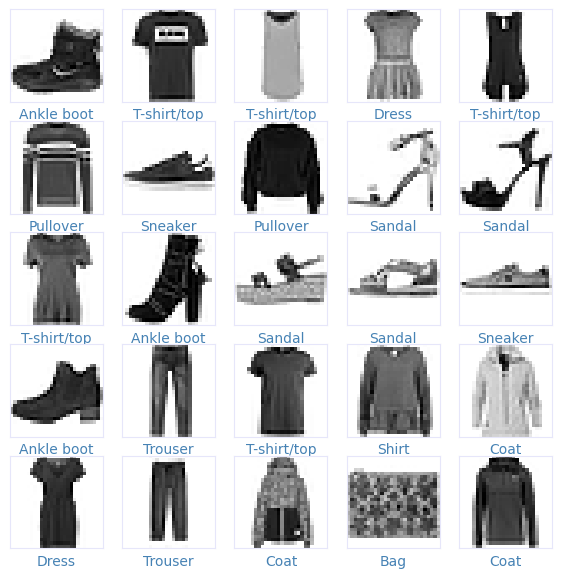

In [ ]:
# import matplotlib.colors as mcolors

plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(25):  # First 25 instances
    plt.subplot(5, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]], color='steelblue')

plt.show()

Veja que o *dataset* **já veio dividido em treinamento e teste**. Mas, vamos criar um conjunto adicional de validação, ``X_valid``, e o respectivo conjunto de *labels* ``y_valid``. Note que separamos 5000 instâncias para o conjunto de validação e o restante será uado para o treinamento.

E como vamos utilizar uma CNN com o algoritmo de treinamento <font color="#66ffff">Gradient Descent (GD) </font> devemos normalizar as *features*. Aqui vamos colocar os pixels na escala $0-1$.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Compilação
--

Antes do modelo ser treinado ele precisa ser compilado através do método ``compile``. Nesse momento especificamos qual será a função *loss* e qual será o otimizador. Opcionalmente podemos fornecer quais métricas de avaliação desejamos calcular durante o processo de treinamento, como por exemplo ``accuracy``.

> A função ``sparse_categorical_crossentropy`` é usada para classes mutuamente exclusivas, i.e., cada instância pertence exatamente a uma classe. No nosso caso, índices exclusivos na faixa de $0$ a $9$.

> Nosso otimizador será o ``Adam``. O default do *learning rate* (``lr``) é $0.01$. Aqui vamos usar $\eta =0.001$ ou $1e-3$.

O otimizador <font color="#66ffff"> Adam (*adaptive moment estimation*) </font> é um algoritmo de otimização que adapta a taxa de aprendizado para cada parâmetro com base em gradientes acumulados e suas magnitudes. Ele combina os mecanismos de momentum e escalonamento adaptativo para obter convergência mais rápida e desempenho aprimorado no treinamento de CNNs.


> Finalmente, em geral, desejamos saber a acurácia do nosso modelo classificador. Assim setamos ``metrics`` para ``sparse_categorical_accuracy``.  A métrica ``sparse_categorical_accuracy`` do Keras é comumente usada em tarefas de classificação em que os *labels* são valores inteiros ou categorias esparsas. Ela mede a precisão das previsões feitas por um modelo, comparando-as com os *labels* verdadeiros.

Depois de compilado nosso modelo está pronto para ser treinado. Vamos lá!🚀

In [ ]:
# Adam optimizer
from tensorflow.keras.optimizers import Adam

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['sparse_categorical_accuracy'])


Treinamento
--

Para efetuar o treinamento basta chamar o método ``fit``, especificando o conjunto de treinamento ``X_train``, os respectivos labels ``y_train``, o número de épocas, aqui $10$, passos por época ($100$) e os conjuntos de validação correspondentes.

A combinação de ``steps_per_epoch`` e ``epochs`` determina o número total de iterações que o modelo fará durante o processo de treinamento. O número real de amostras vistas pelo modelo em cada época é ``steps_per_epoch`` * tamanho do lote (*batch size*).

No nosso caso, o modelo percorrerá 100 *steps* por época, e o processo de treinamento será executado por 10 épocas. O número total de iterações de treinamento será de $100 * 10 = 1000$.

O parâmetro ``epochs`` determina o número total de vezes que o modelo irá iterar por todo o conjunto de dados de treinamento. Em cada época, o modelo percorre ``steps_per_epoch`` *batches* de treinamento. Aumentar o número de épocas permite que o modelo veja os dados várias vezes, potencialmente melhorando sua capacidade de aprender e generalizar. No entanto, é importante encontrar um equilíbrio para evitar o *overfitting*, onde o modelo torna-se muito especializado nos dados de treinamento e tem um desempenho ruim em dados não vistos.

---

> 💡 **Nota**:
Destaca-se que a **validação é opcional**.

---


In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    steps_per_epoch=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
100/100 [==============================] - 19s 55ms/step - loss: 0.7293 - sparse_categorical_accuracy: 0.7369 - val_loss: 0.4171 - val_sparse_categorical_accuracy: 0.8574
Epoch 2/10
100/100 [==============================] - 5s 52ms/step - loss: 0.3678 - sparse_categorical_accuracy: 0.8659 - val_loss: 0.3084 - val_sparse_categorical_accuracy: 0.8890
Epoch 3/10
100/100 [==============================] - 5s 50ms/step - loss: 0.2998 - sparse_categorical_accuracy: 0.8913 - val_loss: 0.2722 - val_sparse_categorical_accuracy: 0.9006
Epoch 4/10
100/100 [==============================] - 5s 50ms/step - loss: 0.2624 - sparse_categorical_accuracy: 0.9053 - val_loss: 0.2584 - val_sparse_categorical_accuracy: 0.9040
Epoch 5/10
100/100 [==============================] - 6s 57ms/step - loss: 0.2379 - sparse_categorical_accuracy: 0.9132 - val_loss: 0.2477 - val_sparse_categorical_accuracy: 0.9100
Epoch 6/10
100/100 [==============================] - 5s 53ms/step - loss: 0.2128 - sparse_cat

> Salvar o Modelo

Antes de prosseguir vamos salvar o modelo treinado.

No Keras, o método ``save_weights`` salva os pesos de um modelo treinado em um arquivo. Os pesos se referem aos parâmetros do modelo, como os pesos e os viéses das camadas da rede neural. Salvar os pesos permite armazenar as informações aprendidas de um modelo treinado para que possam ser reutilizadas ou carregadas em outro modelo posteriormente. Nesse método especificamos um nome de arquivo que será salvo no formato ``h5``.

O formato ``h5`` (*Hierarchical Data Format version 5*), é um formato de arquivo comumente usado em computação científica e análise de dados. É um formato flexível e eficiente para armazenar e organizar grandes quantidades de dados. No contexto do Keras, o formato ``h5`` é frequentemente usado para salvar os pesos de um modelo.

Os pesos salvos no arquivo ``.h5`` podem ser carregados em outro modelo usando o método ``load_weights`` no Keras. Isso permite transferir os parâmetros aprendidos de um modelo para outro ou continuar o treinamento de um modelo a partir de um ponto de verificação salvo.

In [ ]:
model.save_weights('./model.h5', overwrite=True)

In [ ]:
!ls -lh *.h5

-rw-r--r-- 1 root root 6.2M May 21 20:23 model.h5


> Avaliação do Treinamento

Vamos plotar as curvas de acurácia e *loss*.

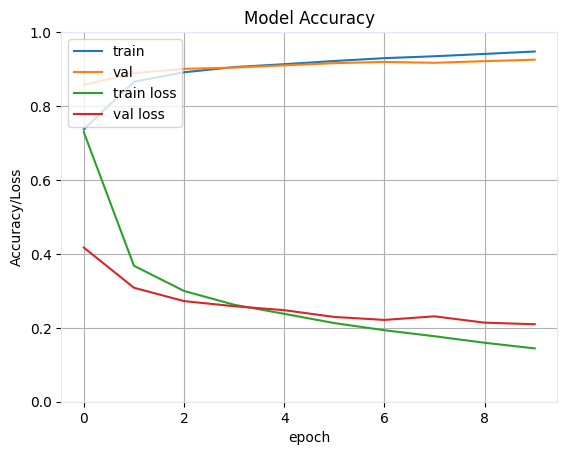

In [ ]:
# Accuracy x Epoch plot
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')

plt.legend(['train', 'val', 'train loss', 'val loss'], loc='upper left')

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 30.9123 - sparse_categorical_accuracy: 0.9004


[30.912256240844727, 0.9003999829292297]

Conseguimos $90\%$!😹🥳

Classificação
--

Uma vez treinado o modelo podemos fazer predições com o método ``predict``.

Vamos ver como o modelo comporta-se com as vinte primeiras instâncias.

In [ ]:
X_new = X_test[:20]
y_proba = model.predict(X_new)

print(f'Probability scores:\n {y_proba.round(2)}')


1/1 [==============================] - 0s 251ms/step
Probability scores:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


O modelo estima uma probabilidade por classe.

Mas, quais são essas classes?

In [ ]:
classes_y = np.argmax(y_proba, axis=1)

print(classes_y)

print(f'Predicted classes:\n {np.array(class_names)[classes_y]}')

[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 4 8 0]
Predicted classes:
 ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat'
 'Shirt' 'Sandal' 'Sneaker' 'Coat' 'Sandal' 'Sandal' 'Dress' 'Coat'
 'Trouser' 'Pullover' 'Coat' 'Bag' 'T-shirt/top']


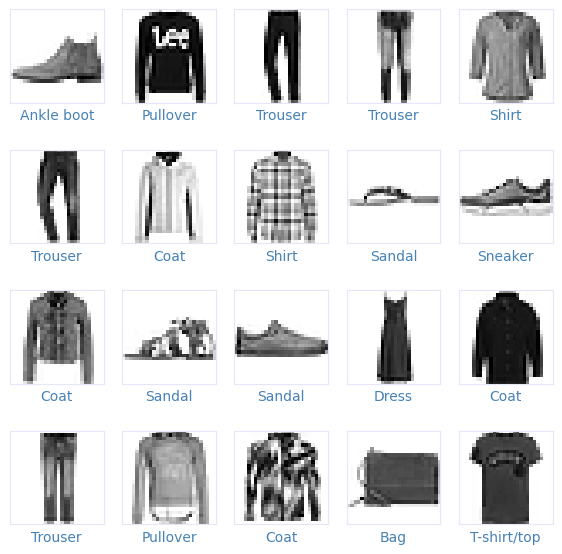

In [ ]:
plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(20):  # First 20 instances
    plt.subplot(4, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[classes_y[i]], color='steelblue')

plt.show()

Finalmente vamos ver o comportamento da nossa CNN em todo o conjunto de teste. Lembrando que temos 1000 instâncias por classe.

313/313 [==============================] - 1s 2ms/step
Accuracy:0.90

[[781   5  41   7   9   1 145   0  11   0]
 [  1 994   0   2   2   0   0   0   1   0]
 [ 10   2 848   5  75   0  59   0   1   0]
 [ 14  37  23 828  66   0  31   0   1   0]
 [  0   1  41   4 913   0  40   0   1   0]
 [  1   0   0   0   0 990   0   5   1   3]
 [ 56   5  70  16  92   0 757   0   4   0]
 [  0   0   0   0   0  23   0 930   2  45]
 [  2   2   1   2   2   1   5   0 985   0]
 [  0   0   0   0   0   6   1  14   1 978]]


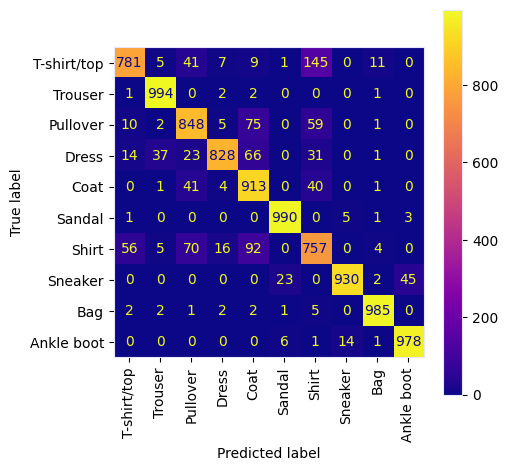

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_proba = model.predict(X_test)

test_pred = np.argmax(y_proba, axis=1)

# Accuracy
acc = accuracy_score(test_pred, y_test)
print(f'Accuracy:{acc:.2f}\n')

# Confusion matrix
cm = confusion_matrix(y_test, test_pred)
print(confusion_matrix(y_test, test_pred))


fig, ax = plt.subplots(figsize=(5, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, display_labels=class_names, xticks_rotation="vertical",
    ax=ax, colorbar=True, cmap="plasma")

plt.show()

*Les carottes sont cuites!* 🥕🥕🥕

---
<font color="#ffb31a">Fabio Alexandre **SPANHOL**</font> <faspanhol@gmail.com>

<font color="#cccccc">*Updated: May 15th 2025*</font>